# Machine Learning Classification with Scikit-learn

In this notebook, we will be using the Scikit-Learn library to build a machine learning model to predict whether an employee will leave the company or not. We will be using the IBM HR Analytics Employee Attrition & Performance dataset. We processed the original dataset using our ETL script and saved the processed dataset as a CSV file. We will be using this processed dataset for our machine learning model.

- **Author**: [Sergio Cuéllar Almagro](https://www.linkedin.com/in/sergio-cu%C3%A9llar-almagro-00526324/)
- **Date**: February 2023
- **Dataset**: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Python Version**: 3.11.2

## Objectives

Several machine learning models will be trained and evaluated to determine the best model for this classification task. Finally, the most effective model will be used to make predictions on the test data. Overall, we will be following the following steps:
- **Data Preparation**: This involves loading the data. We don't need to preprocess or clean the data since we already did that in the ETL script.
- **Model Selection**: We will be choosing a suitable learning algorithm for the classification task. This can be done by considering the nature of the problem and the type of data, as well as experimenting with different algorithms to find the best fit. We have chosen the following algorithms:
    - Logistic Regression
    - Decision Tree
    - Gradient Boosting
    - Support Vector Machine
    - K-Nearest Neighbors
- **Model Training**: In this part, we will be feeding the training data into each algorithm to train the model.
- **Model Fine-Tuning**: This involves adjusting the hyperparameters of the model to improve its performance. We will do this by using the technique known as grid search. This technique will allow us to find the best combination of hyperparameters for each model.
- **Model Evaluation**: We will be testing the model on the test data to evaluate its performance, and will be using the following metrics to measure the performance of the model:
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC AUC Score
- **Model Comparison**: This involves comparing the above metrics for each model to determine the best model for this classification task. We will be using Matplotlib and Seaborn to visualize the results.
- **Model Deployment**: We will be using the trained model to make predictions on new data. The model can be deployed in a variety of ways, including as a standalone application, as a web service, or as a component of a larger system. In this notebook though, we will be deploying it as a simple Python script.

Throughout the notebook, the results of each step will be visually represented and analyzed to gain insights and inform the decision-making process.

## Library Imports and Configuration

We will be importing the following libraries:
- **Pandas**: This library is used for data manipulation and analysis.
- **Numpy**: This library is used for scientific computing and numerical operations.
- **Matplotlib / Seaborn**: These libraries are used for data visualization.
- **Scikit-Learn**: This is the library we will be using for machine learning.


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

We will be using this function to plot the confusion matrix.

In [5]:
def plot_confusion_matrix(y, y_predict):
    '''Plots a confusion matrix'''
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(10, 7))
    plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plot.set_xticklabels(['Staying', 'Leaving'])
    plt.ylabel('Truth')
    plot.set_yticklabels(['Staying', 'Leaving'])
    plt.show()

## Data Preparation

The data is was already prepared in the ETL script, where we performed the following steps:
- **Data Cleaning**: We removed the following columns from the dataset:
    - EmployeeCount
    - EmployeeNumber
    - Over18
    - StandardHours
- **Data Transformation**: We encoded the categorical columns with only two unique values (Gender and Overtime) into numerical values (0 and 1). We also encoded the target columnt(Attrition). We also encoded the categorical columns with more than two unique values (BusinessTravel, Department, EducationField, JobRole, MaritalStatus, and OverTime) using one-hot encoding.

As this dataset is already clean and prepared, we can load it directly into a Pandas DataFrame.


In [6]:
# Data loading
data = pd.read_csv('data_processed.csv')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


Next, we will be splitting the data into X and y. X will contain all the features (scaled using the StandardScaler provided by Scikit-Learn) and y will contain the target column (Attrition) as a numpy array.

In [7]:
y = data['Attrition'].to_numpy() # Storing target variable as numpy array in Y

scaler = StandardScaler()
X = data.drop('Attrition', axis=1) # Dropping target variable from data
X = scaler.fit_transform(X) # Scaling data using StandardScaler

Now, we will be splitting the data into training and test sets. We will be using 80% of the data for training and 20% for testing. We will be using the train_test_split function provided by Scikit-Learn.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

## Model Testing

### Logistic Regression

We will be using the LogisticRegression class provided by Scikit-Learn to train a logistic regression model. This model is a statistical method used for binary classification problems (like the one we have in this case). It aims to model the relationship between a set of input features and a binary output variable, and predicts the probability of the output being either 1 or 0.

![Logistic Regression](https://res.cloudinary.com/practicaldev/image/fetch/s--Ef6VX_4I--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/sdqehrio0jcvg2q6qo1e.png)

We will be using the RandomizedSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **C**: Controls the inverse regularization strength.
- **Penalty**: Specifies the type of regularization to be used. This is usually used to prevent overfitting and can be either L1 or L2.
- **Solver**: Specifies the optimization algorithm used to find the best parameters in the RandomizedSearchCV function. We will be using *lbfgs* for this task.

In [9]:
parameters = { 'C': np.logspace(-3, 3, 7),
               'penalty': ['l2'],
               'solver': ['lbfgs'],
               'max_iter': [1000, 2000, 3000]} # Parameters for RandomizedSearchCV

In [10]:
# MODEL FINE TUNING

logreg = LogisticRegression() # Instantiating the LogisticRegression model
logreg_cv = RandomizedSearchCV(
    estimator=logreg,
    scoring='accuracy',
    param_distributions=parameters,
    cv = 5,
    n_iter=100, # Number of iterations
    n_jobs=-1, # Using all processors
    random_state=21
)   # Instantiating RandomizedSearchCV with the LogisticRegression model

# MODEL FITTING

logreg_cv.fit(X_train, y_train) # Fitting the model

c:\Users\esser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 21 is smaller than n_iter=100. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'max_iter': [1000, 2000, 3000],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=21, scoring='accuracy')

In [11]:
print('Best parameters: ', logreg_cv.best_params_) # Printing the best parameters
print('Best score: ', logreg_cv.best_score_) # Printing the best score

Best parameters:  {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 0.1}
Best score:  0.8733032816444284


#### Model Evaluation

In [12]:
y_predict = logreg_cv.predict(X_test) # Predicting the target variable for the test set

In [13]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
lr_accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: ', lr_accuracy)

lr_precision = precision_score(y_test, y_predict)
print('Precision: ', lr_precision)

lr_recall = recall_score(y_test, y_predict)
print('Recall: ', lr_recall)

lr_f1 = f1_score(y_test, y_predict)
print('F1-score: ', lr_f1)

lr_roc_auc = roc_auc_score(y_test, y_predict)
print('ROC AUC score: ', lr_roc_auc)

Accuracy:  0.891156462585034
Precision:  0.8214285714285714
Recall:  0.46
F1-score:  0.5897435897435898
ROC AUC score:  0.7197540983606558


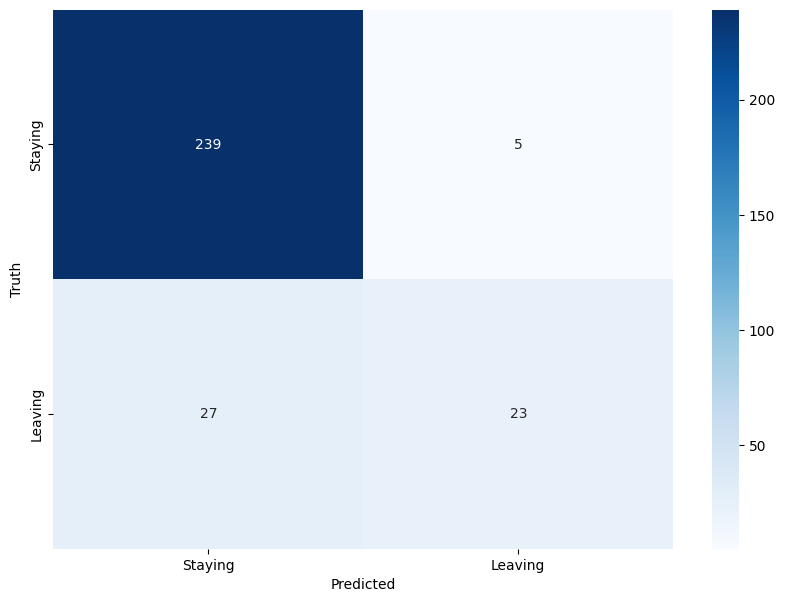

In [14]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_predict)

### Decision Tree

Now, we will be testing the DecisionTreeClassifier model. This model can be used for both classification and regression tasks, but this specifict version is used only for classification. It works by recursively splitting the data into smaller groups based on the values of the input features, and making a prediction based on the group the data point belongs to. They are very powerful and flexible, but they can also be prone to overfitting.

![Decision Tree](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

We will be using the RandomizedSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **Criterion**: Specifies the function used to evaluate the quality of a split.
- **Splitter**: Specifies the algorithm used to choose the split at each node.
- **Max Depth**: Specifies the maximum depth of the tree. Deeper trees may result in overfitting, so it is important to set a maximum depth.
- **Min Samples Split**: Sets the minimum number of samples required to split an internal node. Increasing this value may result in underfitting.
- **Min Samples Leaf**: Sets the minimum number of samples required to be at a leaf node. Increasing this value may result in underfitting.


In [101]:
parameters = { 'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'max_depth': range(1, 51),
               'min_samples_split': range(2, 11),
               'min_samples_leaf': range(2, 11)} # Parameters for RandomizedSearchCV

In [102]:
# MODEL FINE TUNING

tree_clf = DecisionTreeClassifier() # Instantiating the DecisionTreeClassifier model
tree_clf_cv = RandomizedSearchCV(
    estimator=tree_clf,
    scoring='accuracy',
    param_distributions=parameters,
    cv = 5,
    n_iter=9000, # Number of iterations
    n_jobs=-1, # Using all processors
    random_state=42
)   # Instantiating RandomizedSearchCV with the DecisionTreeClassifier model

# MODEL FITTING

tree_clf_cv.fit(X_train, y_train) # Fitting the model

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=9000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 51),
                                        'min_samples_leaf': range(2, 11),
                                        'min_samples_split': range(2, 11),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [103]:
print('Best parameters: ', tree_clf_cv.best_params_) # Printing the best parameters
print('Best score: ', tree_clf_cv.best_score_) # Printing the best score

Best parameters:  {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 5, 'criterion': 'entropy'}
Best score:  0.8545979084024522


#### Model Evaluation

In [104]:
y_predict = tree_clf_cv.predict(X_test) # Predicting the target variable for the test set

In [105]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
dt_accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: ', dt_accuracy)

dt_precision = precision_score(y_test, y_predict)
print('Precision: ', dt_precision)

dt_recall = recall_score(y_test, y_predict)
print('Recall: ', dt_recall)

dt_f1 = f1_score(y_test, y_predict)
print('F1-score: ', dt_f1)

dt_roc_auc = roc_auc_score(y_test, y_predict)
print('ROC AUC score: ', dt_roc_auc)

Accuracy:  0.8537414965986394
Precision:  0.6206896551724138
Recall:  0.36
F1-score:  0.45569620253164556
ROC AUC score:  0.6574590163934426


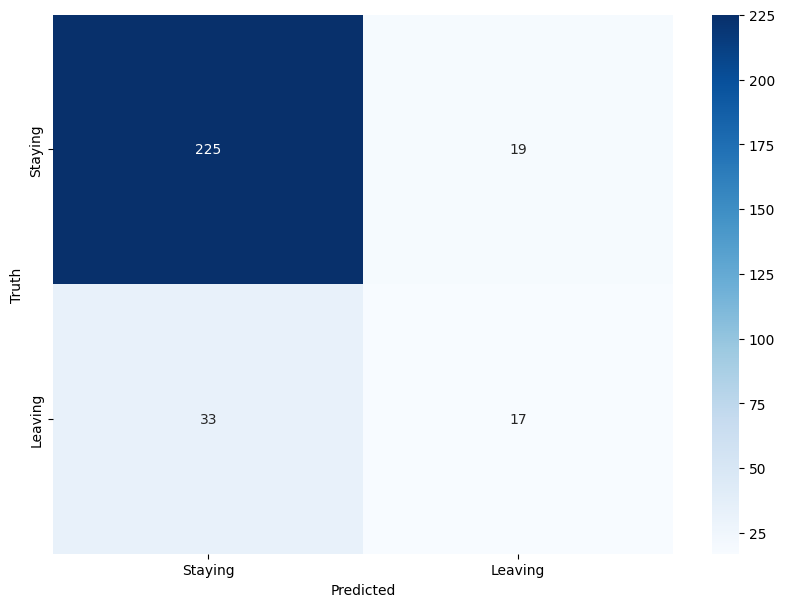

In [20]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_predict)

### Gradient Boosting Classifier

Next, we will be testing the Gradient Boosting Classifier model. This model is an ensemble learning method that combines multiple weak predictive models (such as decision trees) to create a strong predictive model. It works by iteratively training the models on the same dataset, but each model tries to correct the errors made by the previous model. This process is repeated until the model converges. This model is very powerful, and it's often used for imbalanced datasets, like the one we have in this case.

![Gradient Boosting Classifier](https://stackabuse.s3.amazonaws.com/media/gradient-boosting-classifiers-in-python-with-scikit-learn-3.png)

We will be using the RandomizedSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **learning_rate**: Controls the contribution of each tree in the ensemble. Lower values are usually preferred, as they make the model more robust to specific samples.
- **n_estimators**: Specifies the number of trees in the ensemble.
- **max_depth**: Specifies the maximum depth of each tree. Deeper trees may result in overfitting, so it is important to set a maximum depth.
- **subsample**: Specifies the fraction of samples to be used for fitting each tree. Lower values make the model more robust to overfitting, but too small values may result in underfitting. Values usually used are 0.5 to 1.
- **min_samples_split**: Sets the minimum number of samples required to split an internal node. Increasing this value may result in underfitting.

In [177]:
parameters = {'learning_rate': np.linspace(0.01, 0.2, 10),
                'n_estimators': range(100, 1001, 100),
                'max_depth': range(1, 51),
                'subsample': np.linspace(0.5, 1, 10),
                'min_samples_split': range(2, 11)} # Parameters for RandomizedSearchCV

In [178]:
gradientboosting_clf = GradientBoostingClassifier() # Instantiating the GradientBoostingClassifier model
gradientboosting_clf_cv = RandomizedSearchCV(
    estimator=gradientboosting_clf,
    scoring='accuracy',
    param_distributions=parameters,
    cv = 5,
    n_iter=200, # Number of iterations
    n_jobs=-1, # Using all processors
    random_state=42
)   # Instantiating RandomizedSearchCV with the RandomForestClassifier model

# MODEL FITTING

gradientboosting_clf_cv.fit(X_train, y_train) # Fitting the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': range(1, 51),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(100, 1001, 100),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   random_state=42, scoring='accuracy')

In [179]:
# Printing the best parameters and best score
print('Best parameters: ', gradientboosting_clf_cv.best_params_)
print('Best score: ', gradientboosting_clf_cv.best_score_)

Best parameters:  {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 1, 'learning_rate': 0.1577777777777778}
Best score:  0.8698954201226108


#### Model Evaluation

In [180]:
y_predict = gradientboosting_clf_cv.predict(X_test) # Predicting the target variable for the test set

In [181]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
gb_accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: ', gb_accuracy)

gb_precision = precision_score(y_test, y_predict)
print('Precision: ', gb_precision)

gb_recall = recall_score(y_test, y_predict)
print('Recall: ', gb_recall)

gb_f1 = f1_score(y_test, y_predict)
print('F1-score: ', gb_f1)

gb_roc_auc = roc_auc_score(y_test, y_predict)
print('ROC AUC score: ', gb_roc_auc)

Accuracy:  0.891156462585034
Precision:  0.875
Recall:  0.42
F1-score:  0.5675675675675675
ROC AUC score:  0.7038524590163935


### Support Vector Machine

Now, we will be testing the SVC model. This model is used exclusively for classification tasks. It works by finding the best boundary that separates the positive and negative classes, and uses this boundary to make predictions. It is very powerful and can be used for both linear and non-linear classification tasks.

![SVM](https://miro.medium.com/v2/resize:fit:720/0*oPJfynmi4gRfBws1)

We will be using the RandomizedSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **C**: Controls the trade-off between the smooth decision boundary and classifying the training points correctly.
- **Kernel**: Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used.
- **Gamma**: Specifies the kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

In [21]:
parameters = {'C': np.logspace(-4, 4, 9),
              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'gamma': np.logspace(-4, 4, 9)} # Parameters for RandomizedSearchCV

In [22]:
# MODEL FINE TUNING

svm_clf = SVC() # Instantiating the SVC model
svm_clf_cv = RandomizedSearchCV(
    estimator=svm_clf,
    scoring='accuracy',
    param_distributions=parameters,
    cv = 5,
    n_iter=25, # Number of iterations
    n_jobs=-1, # Using all processors
    random_state=42
)   # Instantiating RandomizedSearchCV with the SVC model

# MODEL FITTING

svm_clf_cv.fit(X_train, y_train) # Fitting the model

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                                        'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                                        'kernel': ('linear', 'poly', 'rbf',
                                                   'sigmoid')},
                   random_state=42, scoring='accuracy')

In [23]:
# Printing the best parameters and best score
print('Best parameters: ', svm_clf_cv.best_params_)
print('Best score: ', svm_clf_cv.best_score_)

Best parameters:  {'kernel': 'linear', 'gamma': 100.0, 'C': 0.1}
Best score:  0.8724486116119726


#### Model Evaluation

In [24]:
y_predict = svm_clf_cv.predict(X_test) # Predicting the target variable for the test set

In [25]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
svm_accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: ', svm_accuracy)

svm_precision = precision_score(y_test, y_predict)
print('Precision: ', svm_precision)

svm_recall = recall_score(y_test, y_predict)
print('Recall: ', svm_recall)

svm_f1 = f1_score(y_test, y_predict)
print('F1-score: ', svm_f1)

svm_roc_auc = roc_auc_score(y_test, y_predict)
print('ROC AUC score: ', svm_roc_auc)

Accuracy:  0.8843537414965986
Precision:  0.8636363636363636
Recall:  0.38
F1-score:  0.5277777777777778
ROC AUC score:  0.6838524590163935


### K-Nearest Neighbors

Lastly, we are going to test the KNeighborsClassifier model. This algorithm can be used both for classification and regression tasks, but this specific version is only for classification. It works by finding the K nearest data points to a new, unclassified data point, and using the class or value of the nearest neighbors to make a prediction. KNN is a very simple algorithm, but can be computationally expensive, especially when the dataset is large.

![KNN](https://mlarchive.com/wp-content/uploads/2022/09/img2-3-1024x585.png)

We will be using the RandomizedSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **n_neighbors**: Specifies the number of neighbors to use by default for kneighbors queries.
- **weights**: Specifies the weight function used in prediction. Possible values:
    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
- **algorithm**: Specifies the algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. Possible values:
    - ‘auto’ : will attempt to decide the most appropriate algorithm based on the values passed to fit method.
    - ‘ball_tree’ : will use BallTree
    - ‘kd_tree’ : will use KDTree
    - ‘brute’ : will use a brute-force search.
- **leaf_size**: Specifies the leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. Larger values can lead to faster computation, but may result in increased memory usage.
- **metric**: Sets the distance metric used to calculate the distance between query points and training samples. Common metrics include euclidean, manhattan and minkowski.

In [26]:
parameters = {'n_neighbors': [n for n in range(1, 21, 2)],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [n for n in range(1, 101, 5)],
              'metric': ['euclidean', 'manhattan', 'minkowski']} # Parameters for RandomizedSearchCV

In [27]:
# MODEL FINE TUNING

knn_clf = KNeighborsClassifier() # Instantiating the SVC model
knn_clf_cv = RandomizedSearchCV(
    estimator=knn_clf,
    scoring='accuracy',
    param_distributions=parameters,
    cv = 5,
    n_iter=500, # Number of iterations
    n_jobs=-1, # Using all processors
    random_state=42
)   # Instantiating RandomizedSearchCV with the SVC model

# MODEL FITTING

knn_clf_cv.fit(X_train, y_train) # Fitting the model

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46, 51, 56, 61,
                                                      66, 71, 76, 81, 86, 91,
                                                      96],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [28]:
# Printing the best parameters and best score
print('Best parameters: ', knn_clf_cv.best_params_)
print('Best score: ', knn_clf_cv.best_score_)

Best parameters:  {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 6, 'algorithm': 'brute'}
Best score:  0.8511864406779661


#### Model Evaluation

In [29]:
y_predict = svm_clf_cv.predict(X_test) # Predicting the target variable for the test set

In [30]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
knn_accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: ', knn_accuracy)

knn_precision = precision_score(y_test, y_predict)
print('Precision: ', knn_precision)

knn_recall = recall_score(y_test, y_predict)
print('Recall: ', knn_recall)

knn_f1 = f1_score(y_test, y_predict)
print('F1-score: ', knn_f1)

knn_roc_auc = roc_auc_score(y_test, y_predict)
print('ROC AUC score: ', knn_roc_auc)

Accuracy:  0.8843537414965986
Precision:  0.8636363636363636
Recall:  0.38
F1-score:  0.5277777777777778
ROC AUC score:  0.6838524590163935


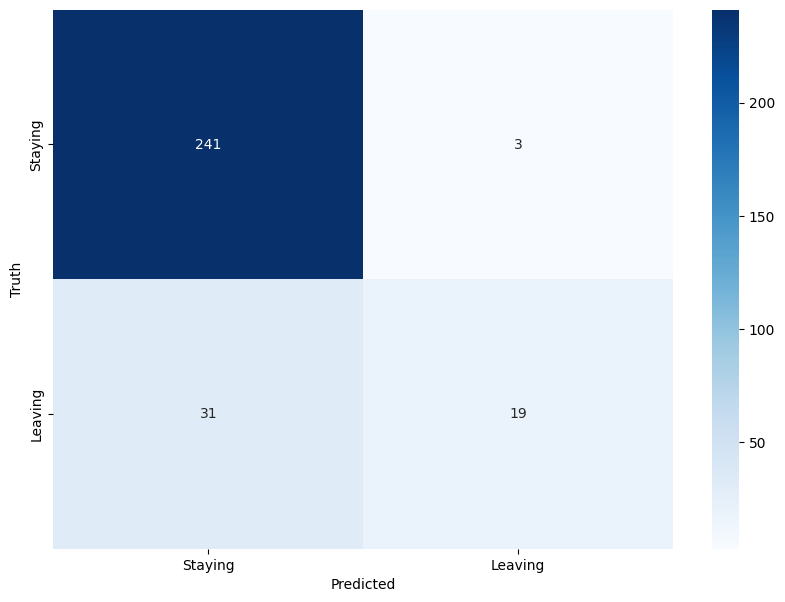

In [31]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_predict)

## Model Comparison

In [185]:
# Defining the style of the plots
sns.set_style('darkgrid',{
    'axes.facecolor': '0.9',
    'grid.color': '0.7',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    })

In [186]:
classification_lineplot = pd.DataFrame({
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc],
    'Gradient Boosting': [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc],
    'Support Vector Machine': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc],
    'K-Nearest Neighbors': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC score']}) # Creating a dataframe for the final lineplot

classification_lineplot = classification_lineplot.melt(id_vars='Metric', var_name='Model', value_name='Score') # Melting the dataframe

classification_report = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'Accuracy': [lr_accuracy, dt_accuracy, gb_accuracy, svm_accuracy, knn_accuracy],
    'Precision': [lr_precision, dt_precision, gb_precision, svm_precision, knn_precision],
    'Recall': [lr_recall, dt_recall, gb_recall, svm_recall, knn_recall],
    'F1-score': [lr_f1, dt_f1, gb_f1, svm_f1, knn_f1],
    'ROC AUC score': [lr_roc_auc, dt_roc_auc, gb_roc_auc, svm_roc_auc, knn_roc_auc],
    'Average Score': [np.mean([lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc]),
                      np.mean([dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc]),
                      np.mean([svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc]),
                      np.mean([knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc]),
                      np.mean([gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc])]})

classification_lineplot


,Metric,Model,Score
0,Accuracy,Logistic Regression,0.891156
1,Precision,Logistic Regression,0.821429
2,Recall,Logistic Regression,0.460000
3,F1-score,Logistic Regression,0.589744
4,ROC AUC score,Logistic Regression,0.719754
5,Accuracy,Decision Tree,0.853741
6,Precision,Decision Tree,0.620690
7,Recall,Decision Tree,0.360000
8,F1-score,Decision Tree,0.455696
9,ROC AUC score,Decision Tree,0.657459


### Accuracy Metrics

The accuracy of a model is the a measure of how often the model predicts correctly. It is calculated by dividing the number of correct predictions by the total number of predictions. However, this metric is not always the best way to evaluate a model. For example, if we have a dataset with 90% of the data belonging to one class and 10% belonging to the other, a model that always predicts the majority class will have an accuracy of 90%, but it will not be a good model.

In the case of this model, the attrition column has a 16.1% of the data belonging to the 'Yes' class, and 83.9% belonging to the 'No' class. This means that the accuracy metric is not the best way to evaluate the model, so we will not be relying too much on it.

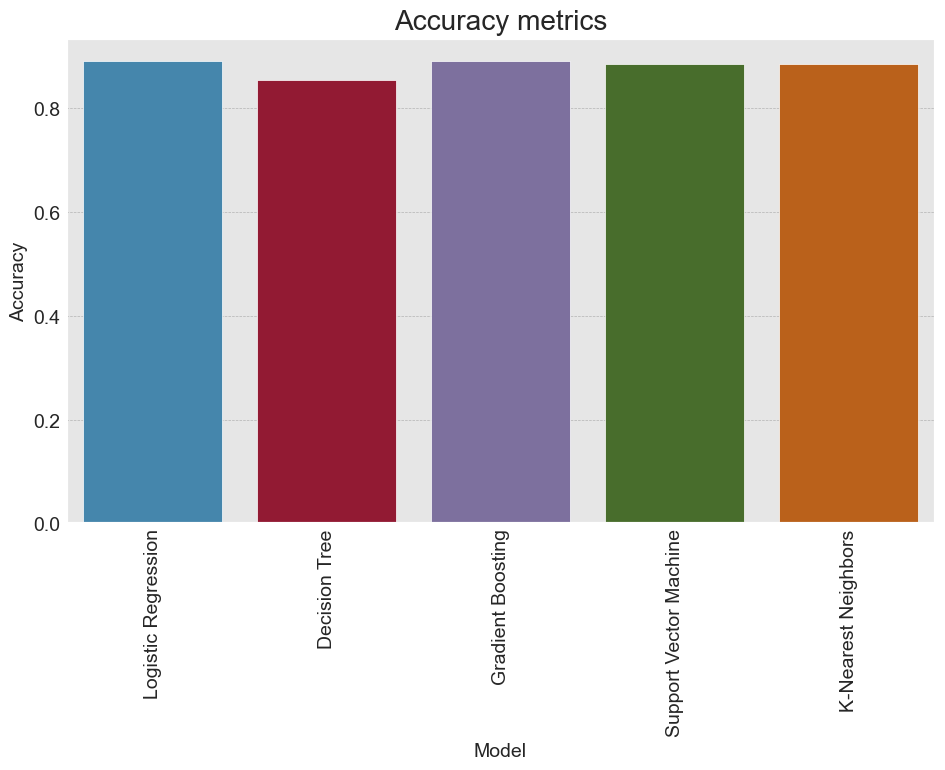

In [197]:
# Plotting the accuracy metrics
plt.figure(figsize=(10, 6))
sns.barplot(data = classification_report, x = 'Model', y = 'Accuracy')
plt.title('Accuracy metrics')
plt.xticks(rotation=90)
plt.show()

### Precision Metrics

The precision metric is a measure of how many of the predicted positive cases were actually positive. It is the ratio of true positives to the sum of true positives and false positives. It is a good metric to use when we want to minimize the number of false positives.

In the case of this model, false positives are not as bad as false negatives. This is because if an employee is predicted to leave the company, but stays in the end, the company will not be losing any assets. For this reason, just like the accuracy metric, we will not be relying too much on the precision metric.

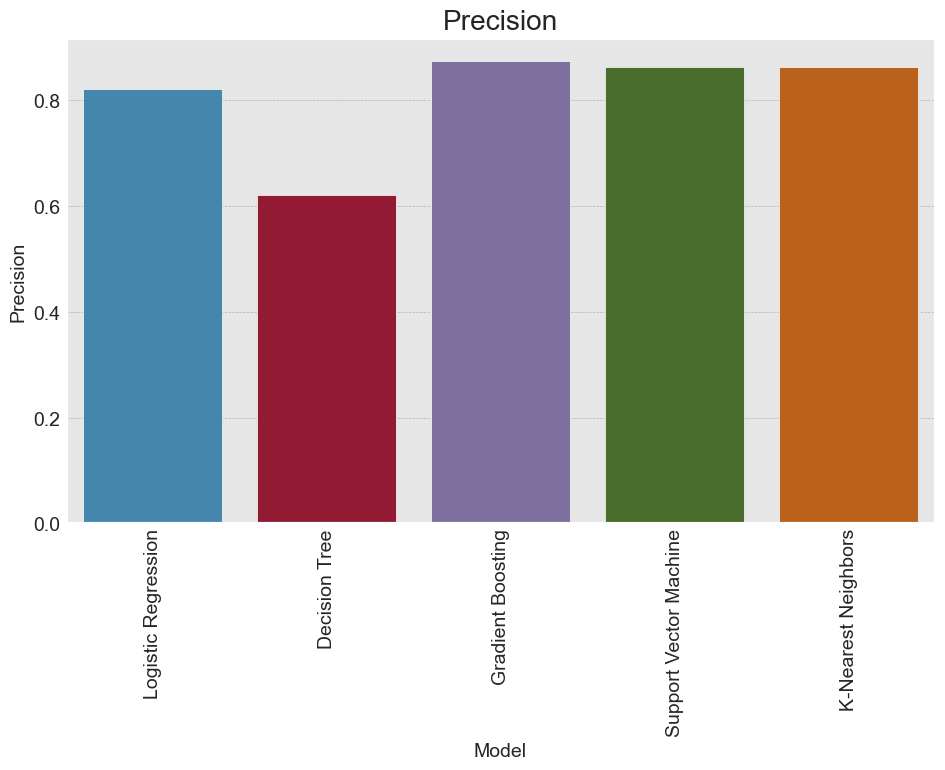

In [202]:
# Plotting the precision metrics
plt.figure(figsize=(10, 6))
sns.barplot(data = classification_report, x = 'Model', y = 'Precision')
plt.title('Precision')
plt.xticks(rotation=90)
plt.show()

### Recall Metrics

The recall metric is a measure of how many of the actual positive cases were predicted correctly. It is the ratio of true positives to the sum of true positives and false negatives. It is a good metric to use when we want to minimize the number of false negatives, so it's very useful for this dataset.

If an employee is predicted to stay in the company, but leaves in the end (false negative), the company will be losing an asset. For this reason, we will be using the recall metric as one of our main metrics to evaluate the model.

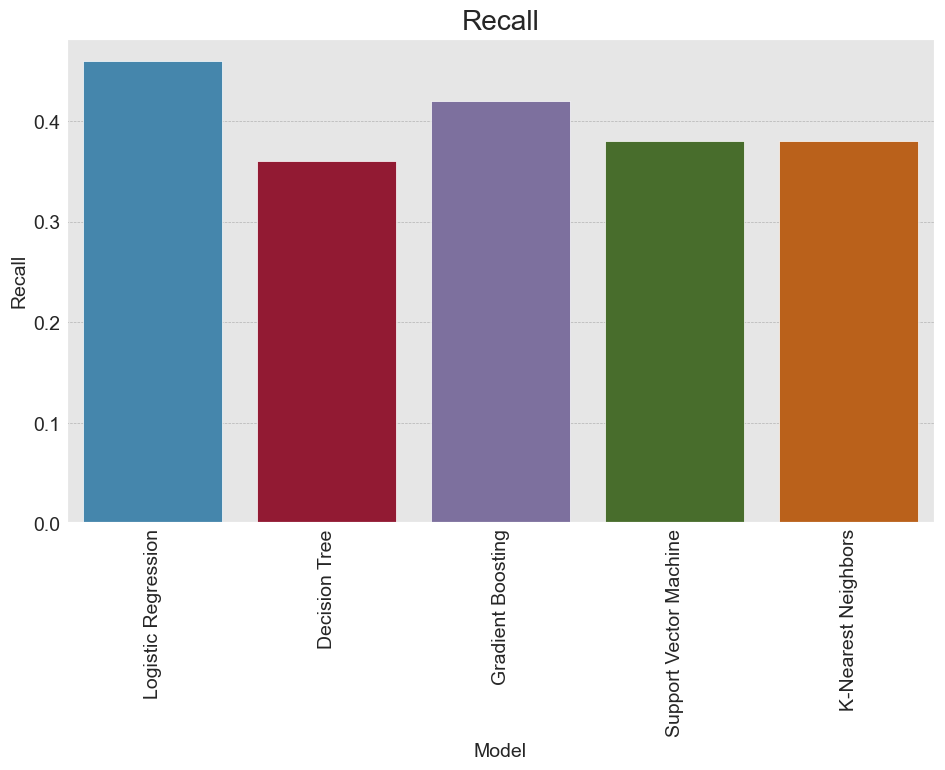

In [203]:
# Plotting the recall metrics
plt.figure(figsize=(10, 6))
sns.barplot(data = classification_report, x = 'Model', y = 'Recall')
plt.title('Recall')
plt.xticks(rotation=90)
plt.show()

### F1 Score

The F1 score is a measure of overall accuracy that balances precision and recall. As we said earlier, precision measures how many of the predicted positive cases were actually positive, and recall measures how many of the actual positive cases were predicted correctly. The F1 score is the harmonic mean of the precision and recall, so it will only be high if both precision and recall are high. This makes it a good metric to use when you care about both precision and recall, and want to balance the trade-off between them.

For this reason, we will be using the F1 score as one of our main metrics to evaluate the model.

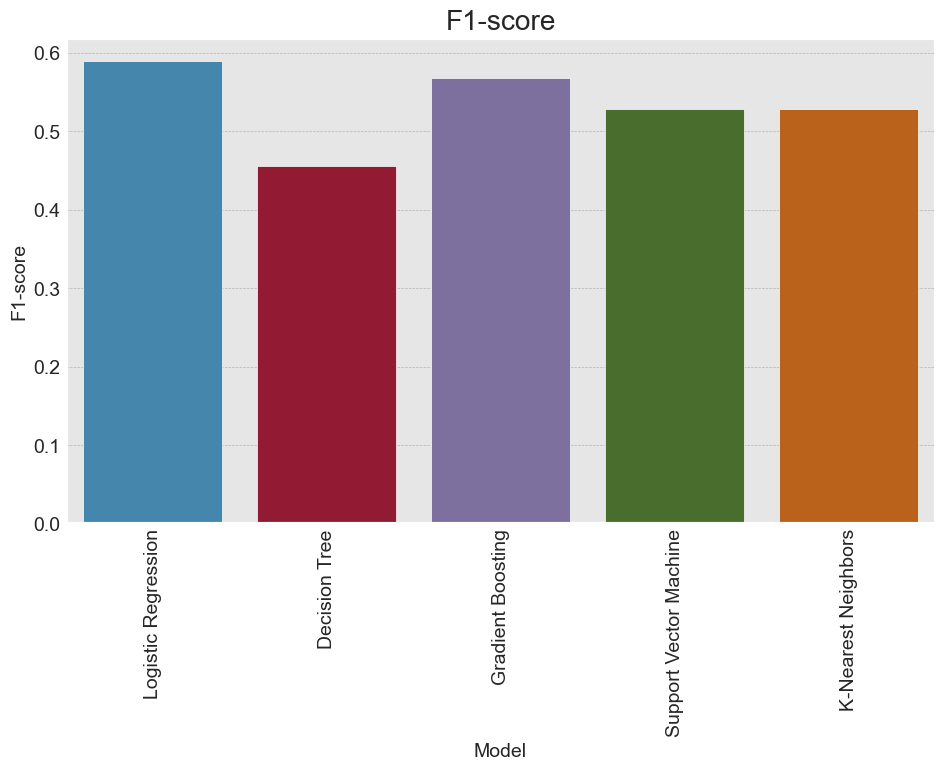

In [204]:
# Plotting the f1-score metrics
plt.figure(figsize=(10, 6))
sns.barplot(data = classification_report, x = 'Model', y = 'F1-score')
plt.title('F1-score')
plt.xticks(rotation=90)
plt.show()

### ROC AUC Score

The ROC AUC score is a measure of how well the model can distinguish between positive and negative classes. It is calculated by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The ROC AUC score is the area under the ROC curve, and it ranges from 0 to 1. A score of 1 means that the model can perfectly distinguish between positive and negative classes, while a score of 0 means that the model cannot distinguish between them at all.

This metris is useful when we have an imbalanced dataset (such as this one), because it can tell us how well the model can distinguish between the classes, even if the classes are not balanced. For this reason, we will be using it as one of our main metrics.

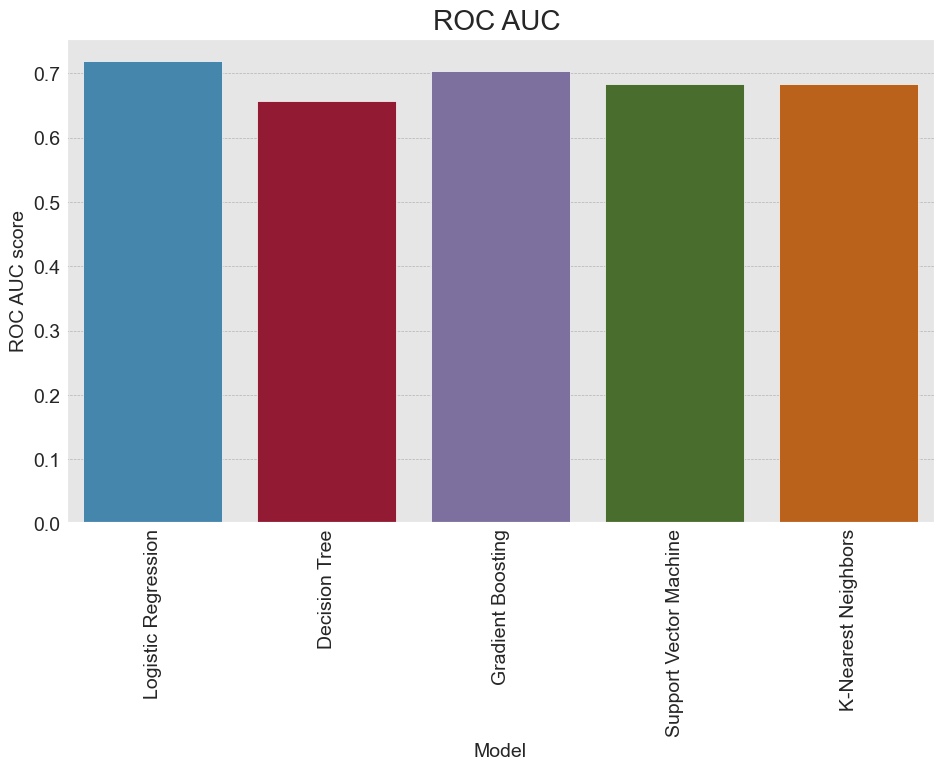

In [205]:
# Plotting the ROC AUC score metrics
plt.figure(figsize=(10, 6))
sns.barplot(data = classification_report, x = 'Model', y = 'ROC AUC score')
plt.title('ROC AUC ')
plt.xticks(rotation=90)
plt.show()

#### Overall Comparison

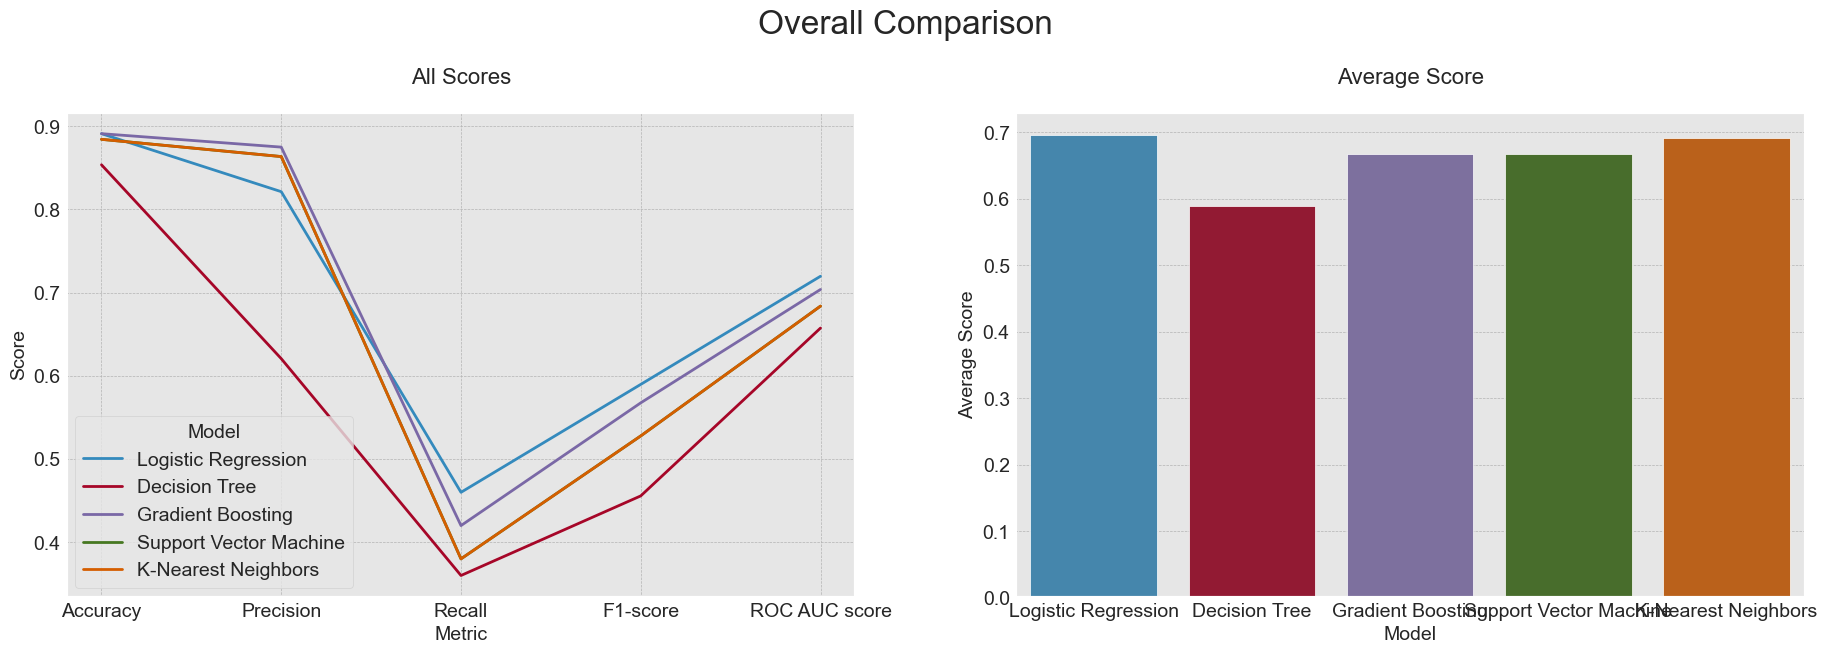

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Overall Comparison', fontsize=24, y=1.05, x=0.5)

# All scores in the same line plot

sns.lineplot(data = classification_lineplot, x = 'Metric', y = 'Score', hue = 'Model', ax=ax[0])

# Barplot for best score

sns.barplot(data = classification_report, x = 'Model', y = 'Average Score', ax=ax[1])

# Setting the title and labels

ax[1].set_title('Average Score', fontsize=16, pad=20)
ax[0].set_title('All Scores', fontsize=16, pad=20)

plt.show()

#### Conclusion

Looking at the results, we can clearly see that the two models that performed the best in our main metrics were the **Logistic Regression** and the **Gradient Boosting** models. The Logistic Regression model had an F1 score of 0.59, a recall score of 0.46 and an ROC AUC score of 0.71, while the Gradient Boosting model had an F1 score of 0.57, a recall score of 0.42 and an ROC AUC score of 0.70. These scores are very similar, so we can say that both models performed equally well.

However, the **Logistic Regression** model is much more resource efficient than the Gradient Boosting model, so we will be using it to make our predictions.

## Model Deployment

*To be filled in later*